In [1]:
import torch
import torch.nn as nn

## Pooling Layers
* nn.AvgPool2d(kernel_size,stride,padding): N C H W ---> N C $H_{out}$ $H_out$, like Conv over per chennel.
* nn.AdaptiveAvgPool2d(output_size): N C H W ---> N C $H_out H_out$, adaptive set kernel size and stride.


In [2]:
# target output size of 5x7
m = nn.AdaptiveAvgPool2d((5,7))
input = torch.randn(1, 64, 8, 9)
output = m(input)
print(output.shape)

# target output size of 7x7 (square)
m = nn.AdaptiveAvgPool2d(7)
input = torch.randn(1, 64, 10, 9)
output = m(input)
print(output.shape)

# target output size of 10x7, None means the size will be the same as that of the input.
m = nn.AdaptiveAvgPool2d((None, 7))
input = torch.randn(1, 64, 10, 9)
output = m(input)
print(output.shape)


torch.Size([1, 64, 5, 7])
torch.Size([1, 64, 7, 7])
torch.Size([1, 64, 10, 7])


## CosineSimilarity(dim, eps)
* Input1: (∗1,D,∗2) where D is at position dim.
* Input2: (∗1,D,∗2) where D is at position dim.
* Output: (*1, *2)


In [3]:
## two dim
import torch
import torch.nn as nn

a = torch.rand(3,100)
b = torch.rand(3,100)
cos = nn.CosineSimilarity(dim=0)
res0 = cos(a, b)
print(res0)

cos = nn.CosineSimilarity(dim=1)
res1 = cos(a, b)
print(res1)
## dim-wise的相似度计算

tensor([0.9793, 0.8000, 0.5780, 0.8042, 0.8193, 0.5568, 0.3611, 0.9062, 0.9556,
        0.7682, 0.8121, 0.9487, 0.6675, 0.9680, 0.8821, 0.9976, 0.9499, 0.9818,
        0.8772, 0.8580, 0.7779, 0.8560, 0.5680, 0.9493, 0.9508, 0.9169, 0.9742,
        0.9411, 0.6988, 0.6746, 0.6758, 0.9184, 0.7449, 0.9640, 0.2279, 0.9803,
        0.9907, 0.8185, 0.8691, 0.5989, 0.9270, 0.7321, 0.7448, 0.9551, 0.4780,
        0.7499, 0.9975, 0.6636, 0.9188, 0.5604, 0.9725, 0.9782, 0.6162, 0.8341,
        0.7403, 0.9293, 0.6928, 0.7981, 0.5737, 0.9970, 0.9013, 0.6388, 0.8118,
        0.9504, 0.5272, 0.5520, 0.3860, 0.7540, 0.8633, 0.8732, 0.5191, 0.4816,
        0.9761, 0.8483, 0.7273, 0.9869, 0.9249, 0.2754, 0.6266, 0.9575, 0.7647,
        0.9776, 0.4968, 0.6360, 0.3201, 0.9913, 0.8668, 0.7730, 0.9719, 0.8153,
        0.9448, 0.3878, 0.8108, 0.7335, 0.7250, 0.3886, 0.9479, 0.8037, 0.7150,
        0.3758])
tensor([0.7251, 0.7421, 0.7795])


In [6]:
## 得到协相似度矩阵,通过矩阵乘法，先normalize，然后矩阵相乘。
co_sim = torch.mm(nn.functional.normalize(a, dim=1), nn.functional.normalize(b, dim=1).T)
co_sim

tensor([[0.7251, 0.7790, 0.7843],
        [0.7499, 0.7421, 0.7852],
        [0.7814, 0.7744, 0.7795]])

In [10]:
## 或着这么搞：
co_sim2 = torch.nn.CosineSimilarity(dim=-1)(a.unsqueeze(1),b.unsqueeze(0))
co_sim2

tensor([[0.7251, 0.7790, 0.7843],
        [0.7499, 0.7421, 0.7852],
        [0.7814, 0.7744, 0.7795]])

In [5]:
# pooling对cos的影响
c = nn.functional.avg_pool1d(a.unsqueeze(0), 2)
d = nn.functional.avg_pool1d(b.unsqueeze(0), 2)
cos = nn.CosineSimilarity(dim=1)
res_pool = cos(a, b)
print(res_pool)
## pool不会影响相似度。错，会影响一些：【1，0】和【0，1】

tensor([0.7251, 0.7421, 0.7795])


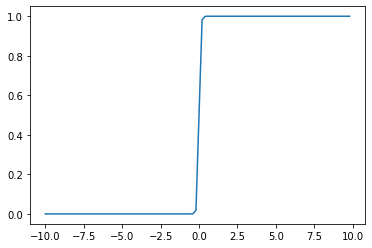

In [68]:
import numpy as np
import matplotlib.pyplot as plt

a = np.arange(-10,10,0.2).tolist()
def elu(e,beta=20):
    return torch.nn.Sigmoid()(beta*torch.tensor(e))

y = list(map(elu, a))
plt.plot(a,y)
plt.show()

In [67]:
elu(0.1335)

tensor(0.8811)